<a href="https://colab.research.google.com/github/Danilo-CVM/TCC/blob/Predict/V4_Classificador_KNN_e_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando Bibliotecas para extração de dados do Yhoo Finance
!pip install yfinance --upgrade --no-cache-dir
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr

yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)


In [2]:
#Indtalando Bibliotecas úteis

#Biblioteca para DropNA
!pip install --upgrade ta

from ta.utils import dropna

#Biblioteca de plotagem
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Requirement already up-to-date: ta in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [3]:
#Definindo dados da importação do banco de dados:

#Escolha a ação
stock= "^DJI"

#Escolha o inicio do período
startyear=1985
startmonth=1
startday=1

start=dt.datetime(startyear,startmonth,startday)

#Escolha o final do período
endyear = 2018
endmonth = 12
endday = 20

now=dt.datetime(endyear,endmonth,endday)

#Rascunho - Código para a escolha dos últimos dados
#now=dt.datetime.now()

#df=pdr.get_data_yahoo(stock,start,now)
#Dado semanais
df=pdr.get_data_yahoo(stock,start,now, interval='1wk')


[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-12-30,3152.100098,3210.639893,3139.310059,3201.500000,3201.500000,471700
1992-01-06,3201.500000,3229.199951,3184.479980,3199.500000,3199.500000,1350900
1992-01-13,3199.500000,3279.959961,3179.110107,3265.000000,3265.000000,1509600
1992-01-20,3265.000000,3269.899902,3215.340088,3232.800049,3232.800049,1086800
1992-01-27,3232.800049,3299.189941,3216.010010,3223.399902,3223.399902,1192600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1408 entries, 1991-12-30 to 2018-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1408 non-null   float64
 1   High       1408 non-null   float64
 2   Low        1408 non-null   float64
 3   Close      1408 non-null   float64
 4   Adj Close  1408 non-null   float64
 5   Volume     1408 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 77.0 KB


In [6]:
#Incluindo os indicadores técnicos no dataframe

##Criando os indicadores de volatilidade Bollinger Bands e ATR

## Initialize Bollinger Bands Indicator
from ta.volatility import BollingerBands
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
#df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
#df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

# Add Width Size Bollinger Bands
#df['bb_bbw'] = indicator_bb.bollinger_wband()

# Add Percentage Bollinger Bands
df['bb_bbp'] = indicator_bb.bollinger_pband()


###############

#Criando o Indicador ATR

#from ta.volatility import AverageTrueRange
#indicator_atr = AverageTrueRange(close=df["Close"], high=df["High"], low=df["Low"], window=14)
#df['atr'] = indicator_atr.average_true_range()



## Criando Indicadores de Tendencia

################

#Criando o Indicador ADX
#from ta.trend import ADXIndicator
#indicator_adx = ADXIndicator(close=df["Close"], high=df["High"], low=df["Low"],  window=14)
#df['adx'] = indicator_adx.adx()
#df['adx_neg'] = indicator_adx.adx_neg()
#df['adx_pos'] = indicator_adx.adx_pos()


###################

########################

## Criando a Média Móvel Exponencial de 12 dias

#from ta.trend import EMAIndicator
#indicator_ema12 = EMAIndicator(close=df["Close"], window=12)
#df['ema12'] = indicator_ema12.ema_indicator()



##Criando o Indicador Média Móvel Exponencial de 36 períodos
#indicator_ema36 = EMAIndicator(close=df["Close"], window=36)
#df['ema36'] = indicator_ema36.ema_indicator()


##Criando o Indicador Média Móvel Exponencial de 5 períodos
#indicator_ema5 = EMAIndicator(close=df["Close"], window=5)
#df['ema5'] = indicator_ema36.ema_indicator()


#####################


# Criando o Indicador MACD

from ta.trend import MACD
indicator_macd = MACD(close=df["Close"])
df['macd_line'] = indicator_macd.macd()
df['macd_hist'] = indicator_macd.macd_diff()
df['macd_signal'] = indicator_macd.macd_signal()


#########################

## Criando o indicador TRIX

#from ta.trend import TRIXIndicator
#indicator_trix = TRIXIndicator(close=df["Close"])
#df['trix'] = indicator_trix.trix()


################################

#Criando indicadores de Volume



#############################


##Criando o Indicador Indice de Força

#from ta.volume import ForceIndexIndicator
#indicator_ifr = ForceIndexIndicator(close=df["Close"], volume=df["Volume"])
#df['ifr'] = indicator_ifr.force_index()

###############################


###############

##Criando o Indicador Indice Money Flow

#from ta.volume import MFIIndicator
#indicator_mfi = MFIIndicator(close=df["Close"], high=df["High"], low=df["Low"], volume=df["Volume"])
#df['mfi'] = indicator_mfi.money_flow_index()

####################





#Criando o Indicador OBV

from ta.volume import OnBalanceVolumeIndicator
indicator_obv = OnBalanceVolumeIndicator(close=df["Close"], volume=df["Volume"])
df['obv'] = indicator_obv.on_balance_volume()



##Criando indicadores de Momentum


###################

#Criando o Indicador PVO

from ta.momentum import PercentageVolumeOscillator
indicator_pvo = PercentageVolumeOscillator(volume=df["Volume"])
df['pvo'] = indicator_pvo.pvo()


####################

#############################

##Criando o Indicador ROC

#from ta.momentum import ROCIndicator
#indicator_roc = ROCIndicator(close=df["Close"])
#df['roc'] = indicator_roc.roc()

###################################

##################################

##Criando o Indicador RSI

from ta.momentum import RSIIndicator
indicator_rsi = RSIIndicator(close=df["Close"])
df['rsi'] = indicator_rsi.rsi()

#######################################


#Criando o Indicador Estocástico


from ta.momentum import StochasticOscillator
indicator_stoch = StochasticOscillator(close=df["Close"], high=df["High"], low=df["Low"])
df['osc_stoch'] = indicator_stoch.stoch()
df['stoch_signal'] = indicator_stoch.stoch_signal()
df.tail()




#### Incluindo indicadores extras para avaliar a evolução do modelo

###Vamos testar os resultados incluindo indicadores de tendencia e avaliando o resltado

### Indicador de teste 1 - Indicador de tendência - Mass Index (MI)

#from ta.trend import MassIndex
#indicator_mi = MassIndex(high=df["High"], low=df["Low"])
#df['mi'] = indicator_mi.mass_index()

### Resultado = Piora = The root mean squared error is 0.02524176479584307.

### Indicador de teste 2 - Indicador de tendência - 

#from ta.trend import IchimokuIndicator
#indicator_ichimoku = IchimokuIndicator(high=df["High"], low=df["Low"])
#df['ichimoku_a'] = indicator_ichimoku.ichimoku_a()
#df['ichimoku_b'] = indicator_ichimoku.ichimoku_b()
#df['ichimoku_conversion_line'] = indicator_ichimoku.ichimoku_conversion_line()

### Resultado = Piora = The root mean squared error is 0.02729386908214642.

### Indicador de teste 3 - Indicador de tendência - Aaron
#from ta.trend import AroonIndicator
#indicator_aroon = AroonIndicator(close=df["Close"])
#df['aroon_down'] = indicator_aroon.aroon_down()
#df['aroon_indicator'] = indicator_aroon.aroon_indicator()
#df['aroon_up'] = indicator_aroon.aroon_up()


### Indicador de teste 4 - Indicador de tendência - CCIIndicator
#from ta.trend import CCIIndicator
#indicator_CCII = CCIIndicator(close=df["Close"], high=df["High"], low=df["Low"])
#df['cci'] = indicator_CCII.cci()




###Vamos testar os resultados incluindo indicadores de Volatilidade e avaliando o resltado

### Indicador de teste 1 - Indicador de Volatilidade - 

#from ta.volatility import UlcerIndex
#indicator_ui = UlcerIndex(close=df["Close"])
#df['ui'] = indicator_ui.ulcer_index()


### Indicador de teste 2 - Indicador de Volatilidade - 

#from ta.volatility import DonchianChannel
#indicator_donchian = DonchianChannel(close=df["Close"], high=df["High"], low=df["Low"])
#df['donchian_hband'] = indicator_donchian.donchian_channel_hband()
#df['donchian_lband'] = indicator_donchian.donchian_channel_lband()
#df['donchian_mband'] = indicator_donchian.donchian_channel_mband()
#df['donchian_pband'] = indicator_donchian.donchian_channel_pband()
#df['donchian_wband'] = indicator_donchian.donchian_channel_wband()

### Indicador de teste 3 - Indicador de Volatilidade - 



,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal
Date,,,,,,,,,,,,,,,,,,
2018-11-19,25392.609375,25392.609375,24268.740234,24285.949219,24285.949219,12493200,25594.040625,26780.773407,24407.307843,-0.051131,76.473098,-175.340004,251.813101,1323808600,1.642981,41.496808,5.785973,39.131593
2018-11-26,24364.130859,25549.710938,24364.130859,25538.460938,25538.460938,17640500,25619.993164,26777.671160,24462.315168,0.464786,82.645105,-135.334397,217.979502,1341449100,2.290896,51.668811,50.050906,33.820560
2018-12-03,25779.570312,25980.210938,24242.220703,24388.949219,24388.949219,16773000,25586.534668,26841.801100,24331.268236,0.022976,-5.160043,-178.511636,173.351593,1324676100,2.340548,44.091754,9.426089,21.754323
2018-12-10,24360.949219,24828.289062,23881.369141,24100.509766,24100.509766,17938900,25519.007129,26931.606610,24106.407647,-0.002088,-96.903860,-216.204363,119.300502,1306737200,2.914474,42.411102,7.137105,22.204700
2018-12-17,23986.830078,24088.080078,23162.640625,23323.660156,23323.660156,13783600,25412.061133,27118.800824,23705.321441,-0.111810,-229.649511,-279.160011,49.510500,1292953600,1.309469,38.189028,4.249467,6.937554


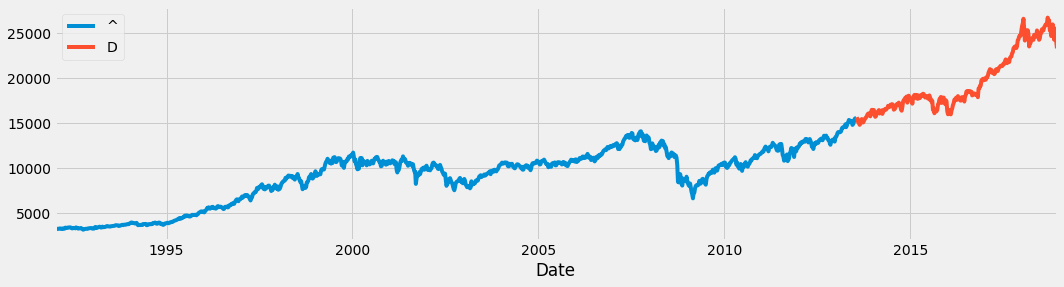

In [7]:
# We have chosen 'Adj Close' attribute for prices. Let's see what it looks like
df["Adj Close"][0:int(len(df)*0.8)].plot(figsize=(16,4),legend=True)
df["Adj Close"][int(len(df)*0.8):].plot(figsize=(16,4),legend=True)
plt.legend(str(stock))
plt.show()

In [8]:
# Transformando os valores absolutos dos indicadores em variações percentuais
# o porquê disso é para a normalização dos dados, podendo, dessa forma, utilizar as variáveis em medidas compararáveis. 
#Além disso valores percentuais têm propriedades estatísticas mais gerenciáveis, como estacionariedade, que não acontece com o preço, por exemplo.
# fonte de consulta: https://www.probabilitycourse.com/chapter10/10_1_4_stationary_processes.php

df2 = df.pct_change()

In [9]:
#Transformando os valores de variações percentuais para variações logaritmicas
#Fazemos isso, por alguns fatores, dentre os quais o mais importnte é forçar uma distribuição normal dos valores de variação percentual.
# Além disso, essa transformação faz com que varições muito pequenas se aproximem das demais variações melhorando a qualidade do algoritimo de aprendizado de máquina.
#fonte: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

df3 = np.log(1 + df2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


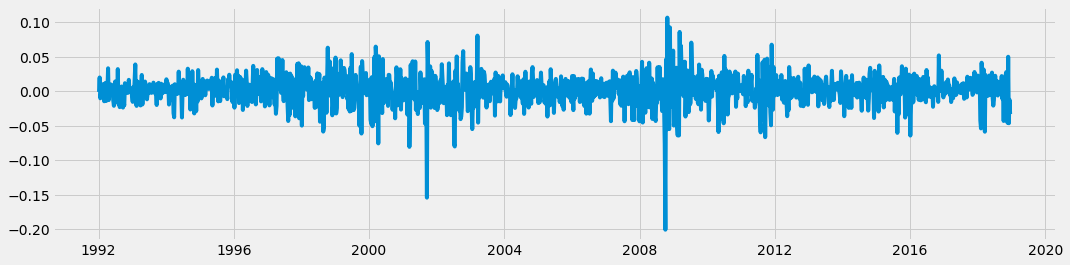

In [10]:
plt.figure(1, figsize=(16,4))
plt.plot(df3["Adj Close"])

In [11]:
df3.head(60)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal
Date,,,,,,,,,,,,,,,,,,
1991-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-01-06,0.015551,0.005764,0.014286,-0.000625,-0.000625,1.052183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-01-13,-0.000625,0.015597,-0.001688,0.020265,0.020265,0.111074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-01-20,0.020265,-0.003072,0.011332,-0.009911,-0.009911,-0.328607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-01-27,-0.009911,0.008918,0.000208,-0.002912,-0.002912,0.092898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.284555,NaN,NaN,NaN,NaN
1992-02-03,-0.002912,-0.005163,-0.002506,0.000620,0.000620,-0.059776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.143384,NaN,NaN,NaN,NaN
1992-02-10,0.000620,0.001157,0.004311,0.006367,0.006367,-0.071960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-02-17,0.006367,0.000204,-0.002013,0.010481,0.010481,-0.068897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.056839,NaN,NaN,NaN,NaN
1992-02-24,0.010481,0.002039,0.007757,-0.003818,-0.003818,-0.009163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.039862,NaN,NaN,NaN,NaN


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1408 entries, 1991-12-30 to 2018-12-17
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1407 non-null   float64
 1   High          1407 non-null   float64
 2   Low           1407 non-null   float64
 3   Close         1407 non-null   float64
 4   Adj Close     1407 non-null   float64
 5   Volume        1407 non-null   float64
 6   bb_bbm        1388 non-null   float64
 7   bb_bbh        1388 non-null   float64
 8   bb_bbl        1388 non-null   float64
 9   bb_bbp        1335 non-null   float64
 10  macd_line     1337 non-null   float64
 11  macd_hist     1256 non-null   float64
 12  macd_signal   1348 non-null   float64
 13  obv           1401 non-null   float64
 14  pvo           1248 non-null   float64
 15  rsi           1394 non-null   float64
 16  osc_stoch     1394 non-null   float64
 17  stoch_signal  1392 non-null   float64
dtypes: float64

In [13]:
# Criando uma coluna LABEL
def f(row):
    if row['Adj Close']  > 0.002:
        val = 1
    else:
        val = 0
    return val

df2['Label'] = df2.apply(f, axis=1)

In [14]:
df2.head(15)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,
1991-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1992-01-06,0.015672,0.005781,0.014388,-0.000625,-0.000625,1.863897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.863897,NaN,NaN,NaN,NaN,0
1992-01-13,-0.000625,0.015719,-0.001686,0.020472,0.020472,0.117477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.717015,NaN,NaN,NaN,NaN,1
1992-01-20,0.020472,-0.003067,0.011396,-0.009862,-0.009862,-0.280074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.723985,NaN,NaN,NaN,NaN,0
1992-01-27,-0.009862,0.008957,0.000208,-0.002908,-0.002908,0.097350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.613059,NaN,NaN,NaN,NaN,0
1992-02-03,-0.002908,-0.005150,-0.002503,0.000620,0.000620,-0.058024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.681261,NaN,NaN,NaN,NaN,0
1992-02-10,0.000620,0.001158,0.004321,0.006387,0.006387,-0.069432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.988965,NaN,NaN,NaN,NaN,1
1992-02-17,0.006387,0.000204,-0.002011,0.010536,0.010536,-0.066577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.877260,NaN,NaN,NaN,NaN,1
1992-02-24,0.010536,0.002042,0.007788,-0.003811,-0.003811,-0.009121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.646496,NaN,NaN,NaN,NaN,0


In [15]:
#Deslocando a coluna "Label" para que possamos prever o período seguinte
df2['Label'] = df2['Label'].shift(-1) 
df2.head(15)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,
1991-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1992-01-06,0.015672,0.005781,0.014388,-0.000625,-0.000625,1.863897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.863897,NaN,NaN,NaN,NaN,1.0
1992-01-13,-0.000625,0.015719,-0.001686,0.020472,0.020472,0.117477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.717015,NaN,NaN,NaN,NaN,0.0
1992-01-20,0.020472,-0.003067,0.011396,-0.009862,-0.009862,-0.280074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.723985,NaN,NaN,NaN,NaN,0.0
1992-01-27,-0.009862,0.008957,0.000208,-0.002908,-0.002908,0.097350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.613059,NaN,NaN,NaN,NaN,0.0
1992-02-03,-0.002908,-0.005150,-0.002503,0.000620,0.000620,-0.058024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.681261,NaN,NaN,NaN,NaN,1.0
1992-02-10,0.000620,0.001158,0.004321,0.006387,0.006387,-0.069432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.988965,NaN,NaN,NaN,NaN,1.0
1992-02-17,0.006387,0.000204,-0.002011,0.010536,0.010536,-0.066577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.877260,NaN,NaN,NaN,NaN,0.0
1992-02-24,0.010536,0.002042,0.007788,-0.003811,-0.003811,-0.009121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.646496,NaN,NaN,NaN,NaN,0.0


In [16]:
#Concatenando o database logarítimico com os labels gerados no database percentual normal
df3=pd.concat([df3,df2['Label']], axis = 1)
df3.head(15)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,
1991-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1992-01-06,0.015551,0.005764,0.014286,-0.000625,-0.000625,1.052183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1992-01-13,-0.000625,0.015597,-0.001688,0.020265,0.020265,0.111074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1992-01-20,0.020265,-0.003072,0.011332,-0.009911,-0.009911,-0.328607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1992-01-27,-0.009911,0.008918,0.000208,-0.002912,-0.002912,0.092898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.284555,NaN,NaN,NaN,NaN,0.0
1992-02-03,-0.002912,-0.005163,-0.002506,0.000620,0.000620,-0.059776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.143384,NaN,NaN,NaN,NaN,1.0
1992-02-10,0.000620,0.001157,0.004311,0.006367,0.006367,-0.071960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1992-02-17,0.006367,0.000204,-0.002013,0.010481,0.010481,-0.068897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.056839,NaN,NaN,NaN,NaN,0.0
1992-02-24,0.010481,0.002039,0.007757,-0.003818,-0.003818,-0.009163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.039862,NaN,NaN,NaN,NaN,0.0


In [17]:
df3.head(60)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,
1991-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1992-01-06,0.015551,0.005764,0.014286,-0.000625,-0.000625,1.052183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1992-01-13,-0.000625,0.015597,-0.001688,0.020265,0.020265,0.111074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1992-01-20,0.020265,-0.003072,0.011332,-0.009911,-0.009911,-0.328607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1992-01-27,-0.009911,0.008918,0.000208,-0.002912,-0.002912,0.092898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.284555,NaN,NaN,NaN,NaN,0.0
1992-02-03,-0.002912,-0.005163,-0.002506,0.000620,0.000620,-0.059776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.143384,NaN,NaN,NaN,NaN,1.0
1992-02-10,0.000620,0.001157,0.004311,0.006367,0.006367,-0.071960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1992-02-17,0.006367,0.000204,-0.002013,0.010481,0.010481,-0.068897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.056839,NaN,NaN,NaN,NaN,0.0
1992-02-24,0.010481,0.002039,0.007757,-0.003818,-0.003818,-0.009163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.039862,NaN,NaN,NaN,NaN,0.0


In [18]:
#Eliminando Valores ausentes e infinitos
df3 = df3.dropna()
filter1 = df3.iloc[df3.values==np.inf]
df3 = df3.drop(filter1.index, axis=0)

In [19]:
df3.iloc[df3.values==np.inf]

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,


In [20]:
df3.head(15)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,
1992-08-24,-0.022726,-0.019937,-0.014549,0.004140,0.004140,0.181224,0.000183,-0.000434,0.000833,1.049055,-0.558261,0.219406,-0.145360,0.223144,-0.297538,0.037233,6.952423,-0.183667,1.0
1992-09-07,0.004367,0.001140,0.001081,0.007226,0.007226,-0.120867,-0.000282,-0.000077,-0.000499,0.513225,-0.111216,-0.187939,-0.167889,0.126789,1.311176,0.059801,0.357798,0.582160,1.0
1992-10-05,-0.015409,-0.024761,-0.032708,-0.020199,-0.020199,0.160478,-0.003779,0.002455,-0.010465,1.176562,0.857308,0.374243,-2.455788,-0.251477,0.513793,-0.133698,2.669484,-0.842938,1.0
1992-10-19,0.011979,-0.000588,0.010369,0.010404,0.010404,0.003709,-0.002906,-0.004135,-0.001578,1.458871,0.055671,-0.155252,0.664066,0.210306,0.200124,0.095231,0.352304,0.637365,1.0
1992-10-26,0.010404,0.012275,0.011358,0.005813,0.005813,-0.083680,-0.001953,-0.002515,-0.001347,0.393114,-0.025414,-0.261907,0.317316,0.160790,0.014073,0.048360,0.154648,0.327810,1.0
1992-11-02,0.005813,0.004059,0.003115,0.004268,0.004268,0.030785,-0.000691,-0.000392,-0.001015,0.201150,-0.076930,-0.376442,0.171096,0.142517,0.035320,0.034433,0.110230,0.189883,0.0
1992-11-09,0.004268,-0.002564,0.001259,-0.002194,-0.002194,-0.125778,-0.000755,-0.000368,-0.001172,-0.048264,-0.051759,-0.363133,0.103795,-0.124576,-0.138294,-0.016129,0.029947,0.094220,0.0
1992-11-16,-0.002194,-0.008240,-0.010800,-0.001734,-0.001734,0.083969,-0.001574,-0.001977,-0.001139,-0.011013,-0.033979,-0.348848,0.067243,-0.155822,-0.019560,-0.013498,-0.041670,0.031195,1.0
1992-11-30,0.016989,0.003682,0.016750,0.001978,0.001978,0.325308,-0.000657,-0.001631,0.000390,0.065550,-0.336283,2.071136,-0.063525,0.145349,0.161968,0.013980,0.034275,0.115430,1.0


In [21]:
neg, pos = np.bincount(df3['Label'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1038
    Positive: 557 (53.66% of total)



In [22]:
df3= df3.drop('Open', axis=1 )
df3= df3.drop('Close', axis=1)
df3= df3.drop('Volume', axis=1)
df3= df3.drop('bb_bbm', axis=1)
df3= df3.drop('bb_bbh', axis=1)
df3= df3.drop('bb_bbl', axis=1)
df3= df3.drop('bb_bbp', axis=1)
df3= df3.drop('macd_hist', axis=1)
df3= df3.drop('pvo', axis=1 )
df3= df3.drop('Low', axis=1 )
df3= df3.drop('High', axis=1 )
#df3= df3.drop('rsi', axis=1 )
#df3= df3.drop('Adj Close', axis=1 )
df3= df3.drop('macd_line', axis=1 )
df3= df3.drop('macd_signal', axis=1 )
df3= df3.drop('obv', axis=1 )
df3= df3.drop('osc_stoch', axis=1 )
df3= df3.drop('stoch_signal', axis=1 )

In [23]:
df3

,Adj Close,rsi,Label
Date,,,
1992-08-24,0.004140,0.037233,1.0
1992-09-07,0.007226,0.059801,1.0
1992-10-05,-0.020199,-0.133698,1.0
1992-10-19,0.010404,0.095231,1.0
1992-10-26,0.005813,0.048360,1.0
...,...,...,...
2018-10-01,-0.000426,-0.002897,0.0
2018-10-08,-0.042761,-0.267188,1.0
2018-10-29,0.023321,0.139665,1.0


#Classificador KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Separando dados de Entrada e Saída para treino e teste
train_data, test_data = df3[0:int(len(df3)*0.8)], df3[int(len(df3)*0.8):]

X_train = train_data.drop(['Label'], axis=1).values
X_test = test_data.drop(['Label'], axis=1).values
Y_train = train_data['Label'].values
Y_test = test_data['Label'].values

In [26]:
# Inserindo mais uma dimensão a Y_train, para que o algoritimo MinMaxScaler e o KNN consigam trabalhar.
Y_train = np.reshape(Y_train, (-1,1))

In [27]:
#Normalizando os dados
sc = MinMaxScaler(feature_range=(0,1))
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
#Treinando o modelo KNN
n_neighbors = 6
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [29]:
y_pred = clf.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1.])

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [31]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.71      0.57        96
         1.0       0.56      0.32      0.41       112

    accuracy                           0.50       208
   macro avg       0.52      0.51      0.49       208
weighted avg       0.52      0.50      0.48       208



In [32]:
confusion_matrix(Y_test, y_pred)

array([[68, 28],
       [76, 36]])

#Classificador Random Forest

In [33]:
Y_train = train_data['Label'].values

In [34]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 10)
# Train the model on training data
rf = rf.fit(X_train, Y_train);

In [35]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)


In [36]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.49      0.61      0.54        96
         1.0       0.57      0.45      0.50       112

    accuracy                           0.52       208
   macro avg       0.53      0.53      0.52       208
weighted avg       0.53      0.52      0.52       208



In [37]:
confusion_matrix(Y_test, predictions)

array([[59, 37],
       [62, 50]])